This notebook is for exploring the relationship between LA strain and LV volume.
Since LV mass is a sign of increased LVDD, and therefore this would enable us to comment on if LA strain correlates with signs of LVDD in our dataset

Results:

* Weak and non-significant correlation between regional and global area strains with LV myo mass and volume...
* Positive and non-signifncant correlation between regional and global area strains with LV_Mass_Volume ratio
* No significant correlations between strains with LV vol

This may be because our cohhort have HFrEF. Patterns of LV vol, LV mass, LV mass/volume ratio may be different in HFrEF cohort compared to HFpEF

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hrs_23_figures import *
from scipy import stats

In [2]:
all_cases = af_cases + nonaf_cases

all_cases.remove("CT-CRT/case10")
all_cases.remove("CT-CRT/case07")
all_cases.remove("EBR/case02")
all_cases.remove("CT-CRT/case27")
all_cases.remove("CT-CRT/case32")

In [3]:
np.loadtxt("/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT/case01/multilabel_seg_analysis/lv_volumes.txt")[0]

176.83158159255981

In [4]:
LV_myo_vol = np.zeros((len(all_cases),))
LV_vol = np.zeros((len(all_cases),))

for i in range(0, len(all_cases)):
    case = all_cases[i]
    
    LV_myo_vol[i] = np.loadtxt(f"/home/csi20/Dropbox/phd/Data/RG_CT_Cases/{case}/multilabel_seg_analysis/LV_Myo_vol.txt")
    LV_vol[i] = np.loadtxt(f"/home/csi20/Dropbox/phd/Data/RG_CT_Cases/{case}/multilabel_seg_analysis/lv_volumes.txt")[0]

In [5]:
LV_myo_mass = 1.055*LV_myo_vol

LV_MassVol_ratio = LV_myo_mass/LV_vol


In [6]:
regions = ['global', 'roof', 'sept', 'lat', 'ant', 'post']

In [9]:
# N_cases X N_regions

## contains reservoir strains
area_strains = np.zeros((len(all_cases), 6))
fiber_strains = np.zeros((len(all_cases), 6))

for i in range(0, len(all_cases)):
    case = all_cases[i]
    
    for j in range(0, len(regions)):
        region = regions[j]
        
        area_strains[i, j] = area_strain_range(case=case, strain_type='area', region=region)
        fiber_strains[i, j] = fibre_strain_range(case=case, fibre_arch='endo_avg', component=0, region=region)

### LV Myocardial Mass

Text(0, 0.5, 'Area strain')

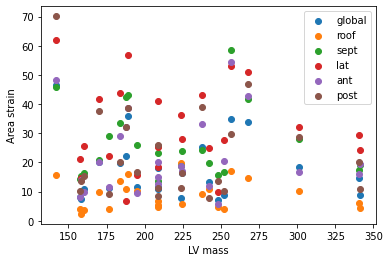

In [17]:
for i in range(0, len(regions)):
    plt.scatter(LV_myo_mass[:], area_strains[:, i], label=regions[i])
    
plt.legend()
plt.xlabel("LV mass")
plt.ylabel("Area strain")

In [19]:
for i in range(0, len(regions)):
    result = stats.pearsonr(LV_myo_mass[:], area_strains[:, i])
    print(result)

(-0.11439152550596815, 0.5945612355727261)
(-0.02284381905359462, 0.9156215369340346)
(-0.07855567888446757, 0.7152136931383531)
(-0.022232292347698822, 0.9178728018655226)
(0.010446728759146935, 0.9613597185321863)
(-0.15700078707725337, 0.46377419704570566)


Text(0.5, 0, 'LV mass')

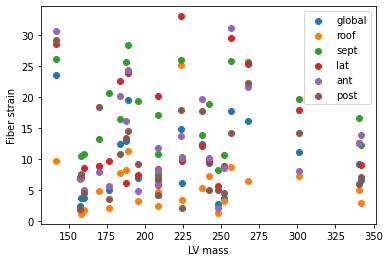

In [18]:
for i in range(0, len(regions)):
    plt.scatter(LV_myo_mass[:], fiber_strains[:, i], label=regions[i])
    
plt.legend()
plt.ylabel("Fiber strain")
plt.xlabel("LV mass")

In [20]:
for i in range(0, len(regions)):
    result = stats.pearsonr(LV_myo_mass[:], fiber_strains[:, i])
    print(result)

(-0.005654653936509487, 0.9790792294305766)
(0.03133950241230135, 0.8844181493482952)
(0.00983946732753281, 0.9636043583503846)
(0.054131073998599545, 0.8016484651297832)
(0.03714769132089019, 0.8631783176340537)
(-0.09276959368453948, 0.6663618027868263)


### LV Mass/Volume Ratio

Text(0.5, 0, 'LV mass/volume ratio')

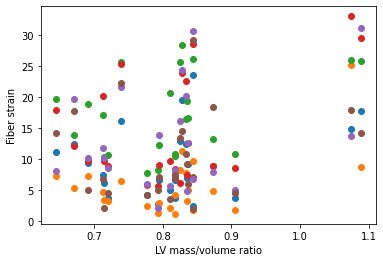

In [23]:
for i in range(0, len(regions)):
    plt.scatter(LV_MassVol_ratio[:], fiber_strains[:, i])
    
plt.ylabel("Fiber strain")
plt.xlabel("LV mass/volume ratio")

In [24]:
for i in range(0, len(regions)):
    result = stats.pearsonr(LV_MassVol_ratio[:], fiber_strains[:, i])
    print(result)

(0.26821722834491574, 0.2050771517936483)
(0.48368026263488456, 0.0166364777423802)
(0.31032137014993244, 0.13999240548305822)
(0.41762651043325516, 0.04229610240658209)
(0.2787497959001837, 0.18716449751604056)
(0.1983900857948422, 0.35272935140703504)


Text(0.5, 0, 'LV mass/volume ratio')

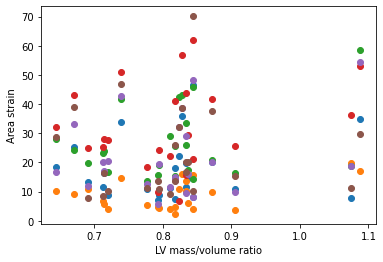

In [21]:
for i in range(0, len(regions)):
    plt.scatter(LV_MassVol_ratio[:], area_strains[:, i])
    
plt.ylabel("Area strain")
plt.xlabel("LV mass/volume ratio")

In [25]:
for i in range(0, len(regions)):
    result = stats.pearsonr(LV_MassVol_ratio[:], area_strains[:, i])
    print(result)

(0.10624049123137391, 0.6212442865184663)
(0.43038128925530056, 0.035788673556909345)
(0.2779048329758182, 0.18856047719778618)
(0.2147186377041263, 0.3136644825643635)
(0.2420639833035668, 0.25444875930492755)
(0.02596959431867613, 0.9041245410858119)


## LV Volume

Text(0.5, 0, 'LV mass/volume ratio')

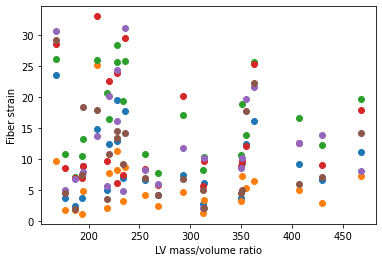

In [26]:
for i in range(0, len(regions)):
    plt.scatter(LV_vol[:], fiber_strains[:, i])
    
plt.ylabel("Fiber strain")
plt.xlabel("LV mass/volume ratio")

In [28]:
for i in range(0, len(regions)):
    result = stats.pearsonr(LV_vol[:], fiber_strains[:, i])
    print(result)

(-0.09272217120237897, 0.666522750006942)
(-0.13427294190527742, 0.5316249252302092)
(-0.0988801342737668, 0.645744905536055)
(-0.09435299899944385, 0.6609961201407597)
(-0.08150500716469972, 0.7049799891464743)
(-0.12321077422641774, 0.5662540568336726)


Text(0.5, 0, 'LV mass/volume ratio')

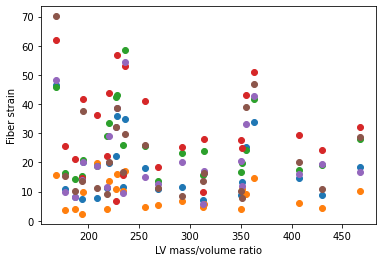

In [27]:
for i in range(0, len(regions)):
    plt.scatter(LV_vol[:], area_strains[:, i])
    
plt.ylabel("Fiber strain")
plt.xlabel("LV mass/volume ratio")

In [29]:
for i in range(0, len(regions)):
    result = stats.pearsonr(LV_vol[:], area_strains[:, i])
    print(result)

(-0.12752670190702875, 0.5526243774564904)
(-0.1626227136419373, 0.4477144766835385)
(-0.17152627364312714, 0.422893734955656)
(-0.08551503084354141, 0.6911453995091338)
(-0.08333011746700501, 0.6986717926527235)
(-0.12387915583704699, 0.5641335323657624)
